<h1><center><font size="5"><font color='BLUE'>ML PIPELINE PROJECT</center></h1>

## <font size="5"><font color='RED'>Data Source and compilation

* This dataset is called the Heart Disease dataset published in the UCI Machine Learning Repository.

* Can be accessed using below link https://archive.ics.uci.edu/ml/datasets/Heart+Disease.

* It originally contained 75 attributes, but only 14 of those attributes have been used by published experiments which we are using too and are given below

#### 1) Age - age in years
#### 2) Sex –
1 = male;
0 = female
#### 3) ChestPain –
1: typical angina
2: atypical angina
3: non-anginal pain
4: asymptomatic
#### 4) Rest_bp – resting BP (mm Hg on admission to the hospital)
#### 5) Cholesterol - serum cholesterol in mg/dl
#### 6) Fast_bld_sugar - (fasting blood sugar > 120 mg/dl)
(1 = true; 0 = false)
#### 7) Rest_Ecg –
0: normal
1: abnormal
2: probable or definite left ventricular enlargement
#### 8) Max_Rt - maximum heart rate achieved
#### 9) Ex_Angina - exercise induced angina
1 = yes;
0 = no
#### 10) St_Depr - ST depression induced by exercise relative to rest
#### 11) Slope - the slope of the peak exercise ST segment
1: upsloping
2: flat
3: down sloping
#### 12) Colored_Vessels - number of major vessels (0-3) colored by flourosopy
#### 13) Thalassemia –
#### 14) Target -

**Import the libraries**

In [128]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import pandas.util.testing as tm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

**Read the data**

In [129]:
data0 = pd.read_csv('Comb_heart_data.csv')

In [130]:
data0.shape

(929, 14)

*The data has 929 rows and 14 columns in it.*

In [131]:
data0

,Age,Sex,ChestPain,Rest_bp,Cholestrol,Fast_bld_sugar,Rest_Ecg,Max_Rt,Ex_Angina,St_Depr,Slope,Colored_Vessels,Thalassemia,Target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,54,0,4,127,333,1,1,154,0,0,?,?,?,1
925,62,1,1,?,139,0,1,?,?,?,?,?,?,0
926,55,1,4,122,223,1,1,100,0,0,?,?,6,2
927,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [8]:
data0.columns = ['Age', 'Sex', 'ChestPain', 'Rest_bp',
                 'Cholestrol', 'Fast_bld_sugar', 'Rest_Ecg', 'Max_Rt', 
                 'Ex_Angina', 'St_Depr', 'Slope', 'Colored_Vessels',
                  'Thalassemia','Target']

## <font size="5"><font color='RED'> 2.0 Data Summary & Analysis
### 2.1 Descriptive statistics
    Dimensions of the dataset
    Peek at the data itself
    Statistical summary of attributes (includes the count, mean, min, max & percentiles)
    Breakdown of the data by the class variable.(# instances of each class as a count)

**Descriptive Statistics**

In [132]:
data0.dtypes

Age                 int64
Sex                 int64
ChestPain           int64
Rest_bp            object
Cholestrol         object
Fast_bld_sugar     object
Rest_Ecg           object
Max_Rt             object
Ex_Angina          object
St_Depr            object
Slope              object
Colored_Vessels    object
Thalassemia        object
Target              int64
dtype: object

In [133]:
data0.shape

(929, 14)

In [134]:
data0.describe(include='all')

,Age,Sex,ChestPain,Rest_bp,Cholestrol,Fast_bld_sugar,Rest_Ecg,Max_Rt,Ex_Angina,St_Depr,Slope,Colored_Vessels,Thalassemia,Target
count,929.00,929.00,929.00,929,929,929,929,929,929,929,929,929,929,929.00
unique,NaN,NaN,NaN,59,181,3,4,118,3,53,4,5,4,NaN
top,NaN,NaN,NaN,120,0,0,0,?,0,0,2,0,3,NaN
freq,NaN,NaN,NaN,103,172,684,467,54,528,280,394,354,355,NaN
mean,55.61,0.77,3.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.18
std,8.99,0.42,0.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.25
min,29.00,0.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
25%,50.00,1.00,3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
50%,57.00,1.00,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
75%,62.00,1.00,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00


In [135]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 14 columns):
Age                929 non-null int64
Sex                929 non-null int64
ChestPain          929 non-null int64
Rest_bp            929 non-null object
Cholestrol         929 non-null object
Fast_bld_sugar     929 non-null object
Rest_Ecg           929 non-null object
Max_Rt             929 non-null object
Ex_Angina          929 non-null object
St_Depr            929 non-null object
Slope              929 non-null object
Colored_Vessels    929 non-null object
Thalassemia        929 non-null object
Target             929 non-null int64
dtypes: int64(4), object(10)
memory usage: 101.7+ KB


In [136]:
data0.isnull().sum()

Age                0
Sex                0
ChestPain          0
Rest_bp            0
Cholestrol         0
Fast_bld_sugar     0
Rest_Ecg           0
Max_Rt             0
Ex_Angina          0
St_Depr            0
Slope              0
Colored_Vessels    0
Thalassemia        0
Target             0
dtype: int64

*The above code tells us that there are no null values present in the dataset*

# **Univariate Analysis**

**A visualization of the Target variable.**

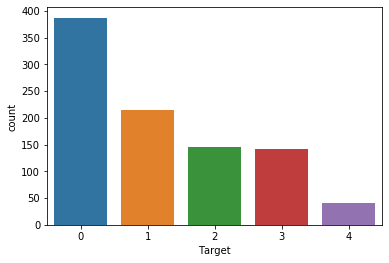

In [101]:
sns.countplot(x = 'Target', data = data0)
plt.show()

In [102]:
print(data0.groupby('Target').size())

Target
0    387
1    214
2    145
3    142
4     41
dtype: int64


*The above visualization and the code shows us that we have a fairly balanced Target variable which is divided as 0 and 1.**

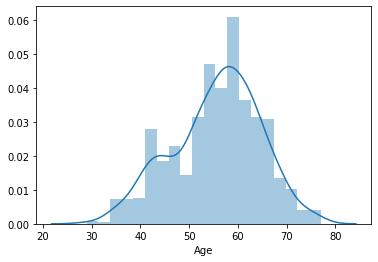

Skewness of Age :  -0.3138344083994114


In [103]:
sns.distplot(data0.Age)
plt.show()
print('Skewness of Age : ',data0.Age.skew())

*With a skewness of -0.22 and with the above plot we can say that the feature 'Age' is fairly symmetrically distributed.*

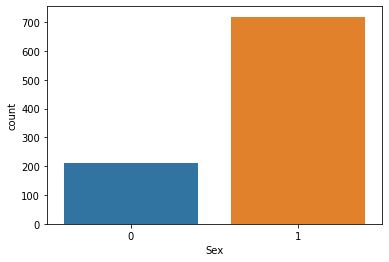

Skewness of Sex :  -1.312036148779098


In [104]:
sns.countplot(data0.Sex)
plt.show()
print('Skewness of Sex : ',data0.Sex.skew())

In [55]:
data0['Age'].unique()

array([63, 67, 37, 41, 56, 62, 57, 53, 44, 52, 48, 54, 49, 64, 58, 60, 50,
       66, 43, 40, 69, 59, 42, 55, 61, 65, 71, 51, 46, 45, 39, 68, 47, 34,
       35, 29, 70, 77, 38, 74, 76], dtype=int64)

In [56]:
data0['Sex'].unique()

array([1, 0], dtype=int64)

In [57]:
data0['ChestPain'].unique()

array([1, 4, 3, 2], dtype=int64)

In [58]:
data0['Rest_bp'].unique()

array([145, 160, 120, 130, 140, 172, 150, 110, 132, 117, 135, 112, 105,
       124, 125, 142, 128, 170, 155, 104, 180, 138, 108, 134, 122, 115,
       118, 100, 200,  94, 165, 102, 152, 101, 126, 174, 148, 178, 158,
       192, 129, 144, 123, 136, 146, 106, 156, 154, 114, 164], dtype=int64)

In [60]:
data0['Cholestrol'].unique()

array([233, 286, 229, 250, 204, 236, 268, 354, 254, 203, 192, 294, 256,
       263, 199, 168, 239, 275, 266, 211, 283, 284, 224, 206, 219, 340,
       226, 247, 167, 230, 335, 234, 177, 276, 353, 243, 225, 302, 212,
       330, 175, 417, 197, 198, 290, 253, 172, 273, 213, 305, 216, 304,
       188, 282, 185, 232, 326, 231, 269, 267, 248, 360, 258, 308, 245,
       270, 208, 264, 321, 274, 325, 235, 257, 164, 141, 252, 255, 201,
       222, 260, 182, 303, 265, 309, 307, 249, 186, 341, 183, 407, 217,
       288, 220, 209, 227, 261, 174, 281, 221, 205, 240, 289, 318, 298,
       564, 246, 322, 299, 300, 293, 277, 214, 207, 160, 394, 184, 315,
       409, 244, 195, 196, 126, 313, 259, 200, 262, 215, 228, 193, 271,
       210, 327, 149, 295, 306, 178, 237, 218, 223, 242, 319, 166, 180,
       311, 278, 342, 169, 187, 157, 176, 241, 131, 100], dtype=int64)

In [61]:
data0['Fast_bld_sugar'].unique()

array([1, 0], dtype=int64)

In [62]:
data0['Rest_Ecg'].unique()

array([2, 0, 1], dtype=int64)

In [63]:
data0['Max_Rt'].unique()

array([150, 108, 129, 187, 172, 178, 160, 163, 147, 155, 148, 153, 142,
       173, 162, 174, 168, 139, 171, 144, 132, 158, 114, 151, 161, 179,
       120, 112, 137, 157, 169, 165, 123, 128, 152, 140, 188, 109, 125,
       131, 170, 113,  99, 177, 141, 180, 111, 143, 182, 156, 149, 145,
       146, 175, 186, 185, 159, 130, 190, 136,  97, 127, 154, 133, 126,
       202, 103, 166, 164, 184, 124, 122,  96, 138,  88, 105, 194, 195,
       106, 115, 167,  95, 192, 117, 121, 116,  71, 118, 181, 134,  90],
      dtype=int64)

In [64]:
data0['Ex_Angina'].unique()

array([0, 1], dtype=int64)

In [65]:
data0['St_Depr'].unique()

array([2.3, 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 3.1, 0.4, 1.3, 0. , 0.5,
       1.6, 1. , 1.2, 0.2, 1.8, 3.2, 2.4, 2. , 2.5, 2.2, 2.8, 3. , 3.4,
       6.2, 4. , 5.6, 2.9, 0.1, 2.1, 1.9, 4.2, 0.9, 1.1, 3.8, 0.7, 0.3,
       4.4])

In [66]:
data0['Slope'].unique()

array([3, 2, 1], dtype=int64)

In [67]:
data0['Colored_Vessels'].unique()

array([0, 3, 2, 1], dtype=int64)

In [68]:
data0['Thalassemia'].unique()

array([6, 3, 7], dtype=int64)

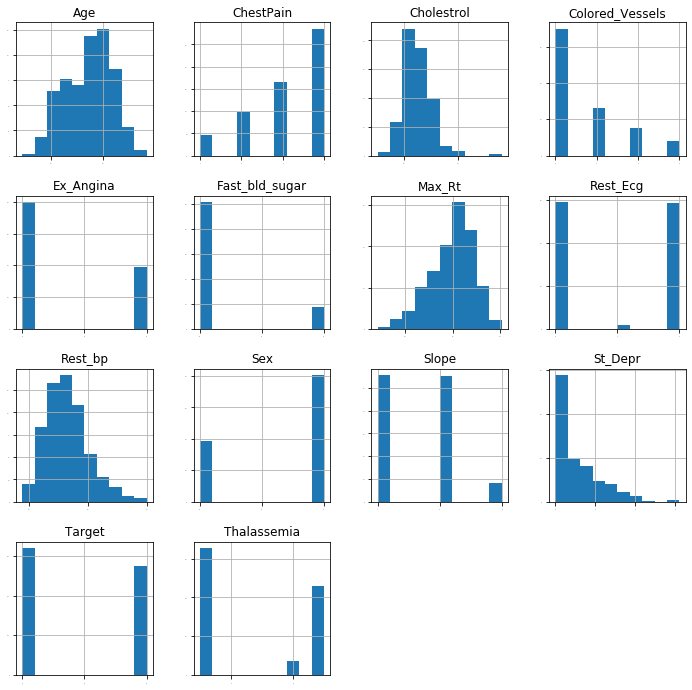

In [165]:
data0.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize =(12,12))
plt.show()

### 3. Correlation Matrix with Heatmap
Correlation Matrix with Heatmap — Correlation indicates how the features are related to each other or to the target variable.
The correlation may be positive (increase in one value of the feature increases the value of the target variable) or negative (increase in one value of the feature decreases the value of the target variable)
Heatmap makes it easy to classify the features are most relevant to the target variable, and we will plot the associated features of the heatmap using the seaborn library.

In [195]:
data0.corr()

,Age,Sex,ChestPain,Rest_bp,Cholestrol,Fast_bld_sugar,Rest_Ecg,Max_Rt,Ex_Angina,St_Depr,Slope,Colored_Vessels,Thalassemia,Target
Age,1.00,-9.22e-02,1.11e-01,0.29,2.01e-01,1.32e-01,0.15,-3.94e-01,9.67e-02,1.97e-01,0.16,0.36,1.27e-01,2.27e-01
Sex,-0.09,1.00e+00,9.91e-03,-0.07,-2.00e-01,3.84e-02,0.03,-6.19e-02,1.45e-01,1.07e-01,0.03,0.09,3.84e-01,2.79e-01
ChestPain,0.11,9.91e-03,1.00e+00,-0.04,6.74e-02,-5.82e-02,0.06,-3.41e-01,3.79e-01,2.04e-01,0.15,0.23,2.70e-01,4.10e-01
Rest_bp,0.29,-6.71e-02,-3.79e-02,1.00,1.34e-01,1.81e-01,0.15,-4.76e-02,6.50e-02,1.91e-01,0.12,0.10,1.37e-01,1.52e-01
Cholestrol,0.20,-2.00e-01,6.74e-02,0.13,1.00e+00,1.46e-02,0.17,6.04e-03,5.20e-02,3.65e-02,-0.01,0.12,5.22e-03,7.46e-02
Fast_bld_sugar,0.13,3.84e-02,-5.82e-02,0.18,1.46e-02,1.00e+00,0.07,-6.94e-03,-1.88e-03,8.04e-03,0.05,0.15,6.13e-02,2.42e-03
Rest_Ecg,0.15,3.27e-02,6.23e-02,0.15,1.69e-01,6.95e-02,1.00,-7.00e-02,7.92e-02,1.13e-01,0.13,0.13,1.68e-02,1.64e-01
Max_Rt,-0.39,-6.19e-02,-3.41e-01,-0.05,6.04e-03,-6.94e-03,-0.07,1.00e+00,-3.86e-01,-3.48e-01,-0.39,-0.27,-2.77e-01,-4.25e-01
Ex_Angina,0.10,1.45e-01,3.79e-01,0.06,5.20e-02,-1.88e-03,0.08,-3.86e-01,1.00e+00,2.90e-01,0.25,0.15,3.29e-01,4.23e-01
St_Depr,0.20,1.07e-01,2.04e-01,0.19,3.65e-02,8.04e-03,0.11,-3.48e-01,2.90e-01,1.00e+00,0.58,0.29,3.45e-01,4.24e-01


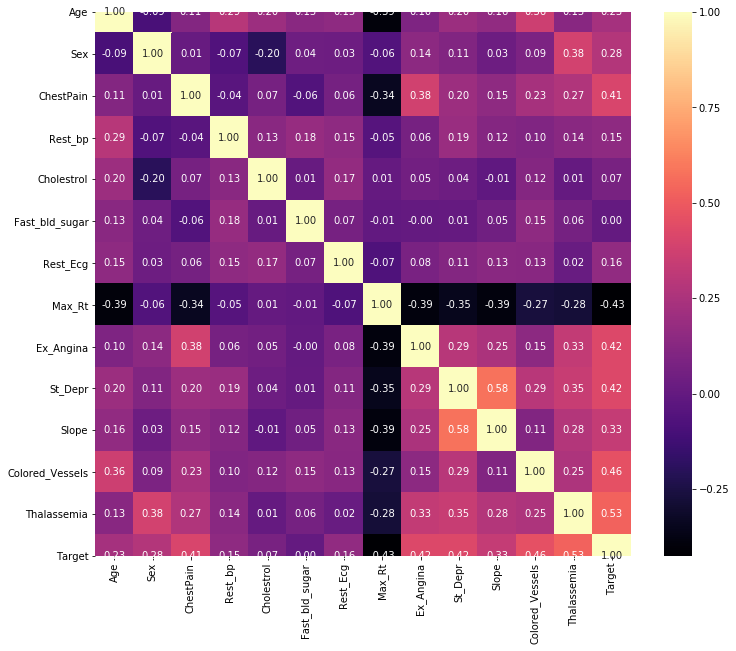

In [196]:
plt.figure(figsize=(12,10))
sns.heatmap(data0.corr(),annot=True,cmap="magma",fmt='.2f')

<font size="5"><font color='red'>**DATA  VISUALISATION**</font></font>

<font size="3"><font color='BLUE'>**UNIVARIATE ANALYSIS**</font></font>

<font size="5"><font color='purple'>**age variable**</font></font>
<font size="2"><font color='grey'>The person’s age in years</font></font>

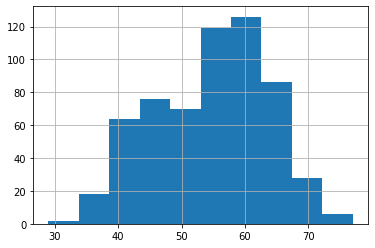

In [199]:
data0['Age'].hist();

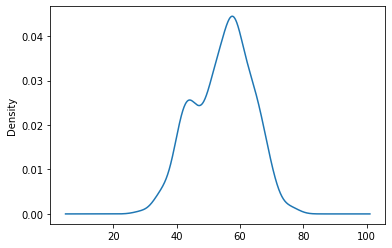

In [200]:
data0['Age'].plot.kde() # desinty plot of 'age' variable

plt.show()

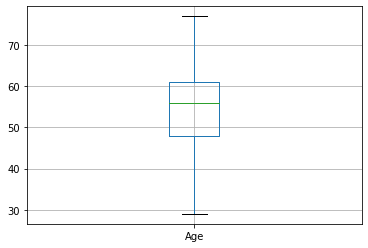

In [201]:
data0[['Age']].boxplot();

* <font size="3"><font color='BLUE'>In independent variable -:age, the distribution is approximately symmetric by looking at it's density and histogram  plot.</font></font>
* <font size="3"><font color='BLUE'>There are no outliers present in age variable by looking at it's boxplot.</font></font>

<font size="5"><font color='purple'>**sex variable (categorical variable)**</font></font>
<font size="2"><font color='grey'>The person’s sex (1 = male, 0 = female)</font></font>

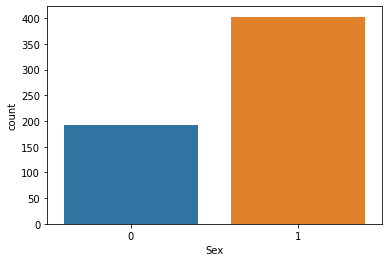

In [204]:
sns.countplot(x='Sex', data= data0);

In [205]:
data0['Sex'].value_counts()

1    403
0    192
Name: Sex, dtype: int64

<font size="5"><font color='purple'>**ChestPain variable (categorical variable)**</font></font>

<font size="2"><font color='grey'>1: typical angina
2: atypical angina
3: non-anginal pain
4: asymptomatic
</font></font>

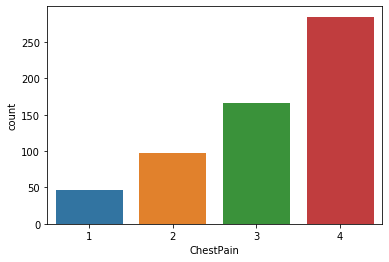

In [206]:
sns.countplot(x='ChestPain',data=data0);

In [207]:
data0['ChestPain'].value_counts()

4    285
3    166
2     98
1     46
Name: ChestPain, dtype: int64

<font size="5"><font color='purple'>**Rest_bp**</font></font>

<font size="2"><font color='grey'>The person’s resting blood pressure (mm Hg on admission to the hospital)</font></font>

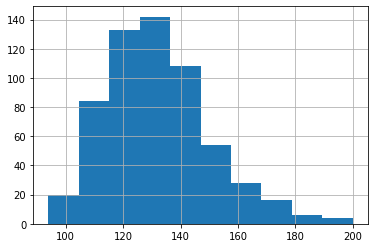

In [208]:
data0['Rest_bp'].hist();

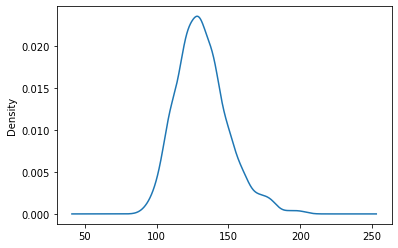

In [209]:
data0['Rest_bp'].plot.kde();

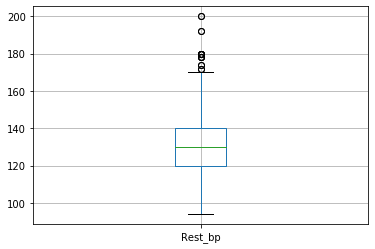

In [210]:
data0[['Rest_bp']].boxplot();

* <font size="3"><font color='BLUE'>In independent variable -:Rest_bp, the distribution is moderately positively  skewed by looking at it's density and histogram  plot.</font></font>
* <font size="3"><font color='BLUE'>There are  outliers present in **Rest_bp** variable by looking at it's boxplot.</font></font>
* <font size="3"><font color='BLUE'>transformation is required.</font></font>

<font size="5"><font color='purple'>**Cholesterol**</font></font><font>

<font size="2"><font color='grey'>The person’s cholesterol measurement in mg/dl</font></font>

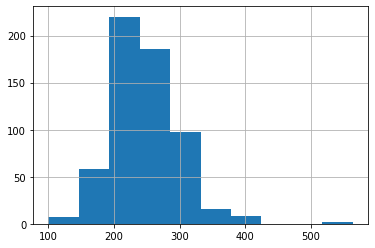

In [212]:
data0['Cholestrol'].hist();

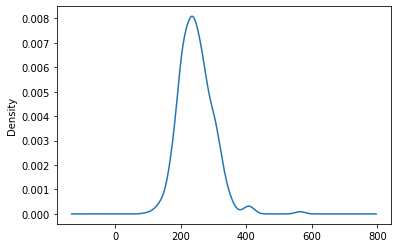

In [213]:
data0['Cholestrol'].plot.kde();

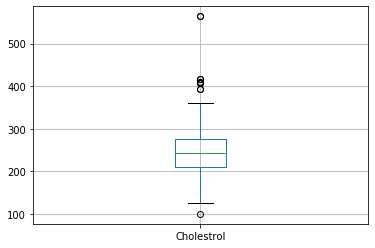

In [214]:
data0[['Cholestrol']].boxplot();

* <font size="3"><font color='BLUE'>In independent numeric variable -:cholesterol, the distribution is moderately positively  skewed by looking at it's density and histogram  plot.</font></font>
* <font size="3"><font color='BLUE'>There are  outliers present in **cholesterol** variable by looking at it's boxplot.</font></font>
* <font size="3"><font color='BLUE'>transformation is required.</font></font>

<font size="5"><font color='purple'>**Fast_bld_sugar (categorical variable)**</font></font><font>

<font size="2"><font color='grey'>The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)</font></font>

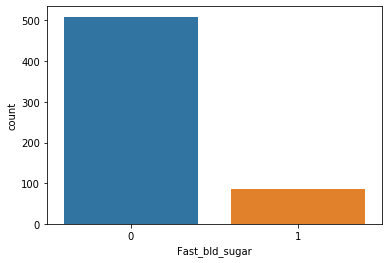

In [216]:
sns.countplot(x='Fast_bld_sugar',data=data0);

In [217]:
data0['Fast_bld_sugar'].value_counts()

0    509
1     86
Name: Fast_bld_sugar, dtype: int64

<font size="5"><font color='purple'>**Rest_Ecg – (categorical variable)**</font></font><font>

<font size="2"><font color='grey'>0: normal
1: abnormal
2: probable or definite left ventricular enlargement</font></font>

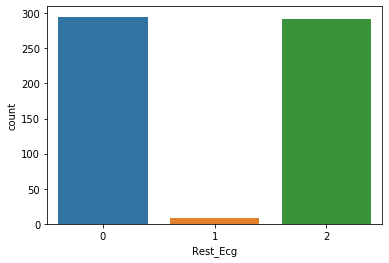

In [218]:
sns.countplot(x='Rest_Ecg' , data=data0);

In [219]:
data0['Rest_Ecg'].value_counts()

0    295
2    292
1      8
Name: Rest_Ecg, dtype: int64

<font size="5"><font color='purple'>**Max_Rt**</font></font><font>

<font size="2"><font color='grey'>maximum heart rate achieved</font></font>

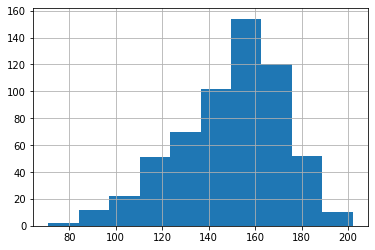

In [221]:
data0.Max_Rt.hist();

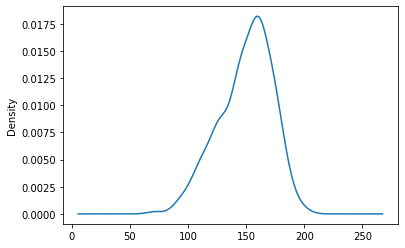

In [222]:
data0['Max_Rt'].plot.kde();

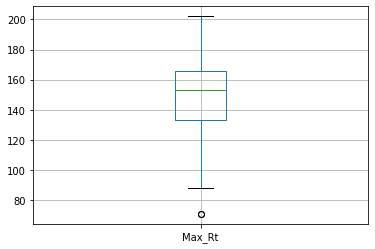

In [223]:
data0[['Max_Rt']].boxplot();

 <font size="3"><font color='BLUE'>In independent numeric variable -:**Max_Rt**, the distribution is  negatively  skewed by looking at it's density and histogram  plot.</font></font>
* <font size="3"><font color='BLUE'>There are  outliers present in **Max_Rt** variable by looking at it's boxplot.</font></font>
* <font size="3"><font color='BLUE'>transformation is required.</font></font>

<font size="5"><font color='purple'>**Ex_Angina – (categorical variable)**</font></font><font>

<font size="2"><font color='grey'>Exercise induced angina
1 = yes; 0 = no</font></font>

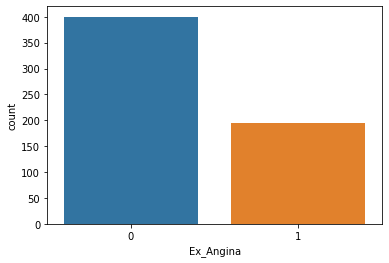

In [224]:
sns.countplot(x='Ex_Angina' , data=data0);

In [225]:
data0['Ex_Angina'].value_counts()

0    400
1    195
Name: Ex_Angina, dtype: int64

<font size="5"><font color='purple'>**St_Depr**</font></font><font>

<font size="2"><font color='grey'>ST depression induced by exercise relative to rest</font></font>

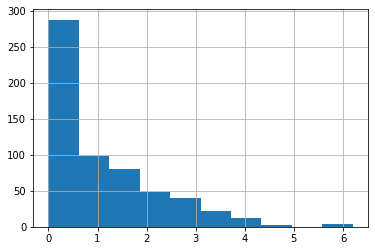

In [226]:
data0.St_Depr.hist();

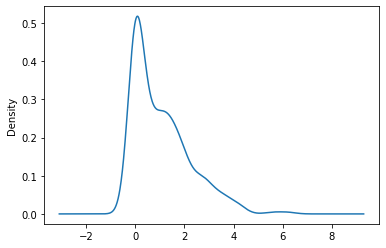

In [227]:
data0['St_Depr'].plot.kde();

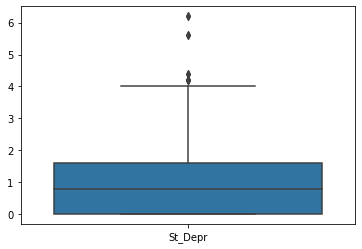

In [228]:
sns.boxplot(data=data0[['St_Depr']]);

 <font size="3"><font color='BLUE'>In independent numeric variable -:**St_Depr**, the distribution is  highly positively skewed by looking at it's density and histogram  plot.</font></font>
* <font size="3"><font color='BLUE'>There are  outliers present in **St_Depr** variable by looking at it's boxplot.</font></font>
* <font size="3"><font color='BLUE'>transformation is required.</font></font>

<font size="5"><font color='purple'>**Slope** - (categorical variable)</font></font><font>

<font size="2"><font color='grey'> the slope of the peak exercise ST segment (1: upsloping 2: flat 3: down sloping)</font></font>

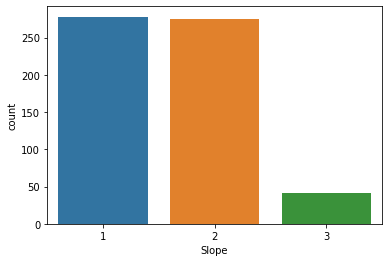

In [230]:
sns.countplot(x='Slope' , data=data0);

In [231]:
data0['Slope'].value_counts()

1    278
2    275
3     42
Name: Slope, dtype: int64

<font size="5"><font color='purple'>**Colored_Vessels** - (categorical variable)</font></font><font>

<font size="2"><font color='grey'> number of major vessels (0-3) colored by flourosopy</font></font>

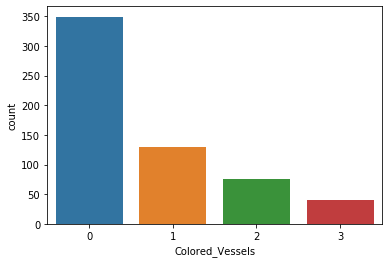

In [232]:
sns.countplot(x='Colored_Vessels' , data=data0);

In [233]:
data0['Colored_Vessels'].value_counts()

0    349
1    130
2     76
3     40
Name: Colored_Vessels, dtype: int64

<font size="5"><font color='purple'>**Thalassemia** - (categorical variable)</font></font><font>

<font size="2"><font color='grey'> </font></font>

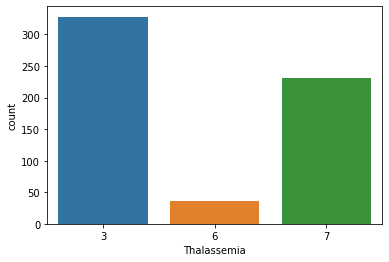

In [234]:
sns.countplot(x='Thalassemia' , data= data0);

In [235]:
data0['Thalassemia'].value_counts()

3    328
7    231
6     36
Name: Thalassemia, dtype: int64

In [246]:
import pandas_profiling as pp
pp.ProfileReport(data0)

Dropping rows was a more sensible idea.

After dropping the rows, the data types were correctly renamed.

In [137]:
data0['Thalassemia'].replace('?', np.nan, inplace= True)

In [138]:
data0['Colored_Vessels'].replace('?', np.nan, inplace= True)
data0.dropna(inplace=True)
print(data0.shape)

(595, 14)


**Changing all variables from object to numerical data types.**

In [139]:
data0.Rest_bp = data0.Rest_bp.astype('int')
data0.Cholestrol = data0.Cholestrol.astype('int')
data0.Fast_bld_sugar = data0.Fast_bld_sugar.astype('int')
data0.Rest_Ecg = data0.Rest_Ecg.astype('int')
data0.Max_Rt = data0.Max_Rt.astype('int')
data0.Ex_Angina = data0.Ex_Angina.astype('int')
data0.St_Depr = data0.St_Depr.astype('float')
data0.Slope = data0.Slope.astype('int')
data0.Colored_Vessels = data0.Colored_Vessels.astype('int')
data0.Thalassemia = data0.Thalassemia.astype('int')

**A look at whether all the features were converted to numeric data types.**

In [140]:
data0.dtypes

Age                  int64
Sex                  int64
ChestPain            int64
Rest_bp              int32
Cholestrol           int32
Fast_bld_sugar       int32
Rest_Ecg             int32
Max_Rt               int32
Ex_Angina            int32
St_Depr            float64
Slope                int32
Colored_Vessels      int32
Thalassemia          int32
Target               int64
dtype: object

In [141]:
#Peek at the data itself
print(data0.head(10).T)

                     0      1      2      3      4      5      6      7      8      9
Age               63.0   67.0   67.0   37.0   41.0   56.0   62.0   57.0   63.0   53.0
Sex                1.0    1.0    1.0    1.0    0.0    1.0    0.0    0.0    1.0    1.0
ChestPain          1.0    4.0    4.0    3.0    2.0    2.0    4.0    4.0    4.0    4.0
Rest_bp          145.0  160.0  120.0  130.0  130.0  120.0  140.0  120.0  130.0  140.0
Cholestrol       233.0  286.0  229.0  250.0  204.0  236.0  268.0  354.0  254.0  203.0
Fast_bld_sugar     1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0
Rest_Ecg           2.0    2.0    2.0    0.0    2.0    0.0    2.0    0.0    2.0    2.0
Max_Rt           150.0  108.0  129.0  187.0  172.0  178.0  160.0  163.0  147.0  155.0
Ex_Angina          0.0    1.0    1.0    0.0    0.0    0.0    0.0    1.0    0.0    1.0
St_Depr            2.3    1.5    2.6    3.5    1.4    0.8    3.6    0.6    1.4    3.1
Slope              3.0    2.0    2.0    3.0    1.0    

In [142]:
#Statistical summary of all attributes
from pandas import set_option
set_option('display.width', 100) 
set_option('precision', 2)
print(data0.describe())

          Age     Sex  ChestPain  Rest_bp  Cholestrol  Fast_bld_sugar  Rest_Ecg  Max_Rt  \
count  595.00  595.00     595.00   595.00      595.00          595.00    595.00  595.00   
mean    54.54    0.68       3.16   131.67      247.10            0.14      0.99  149.55   
std      9.03    0.47       0.96    17.74       52.26            0.35      0.99   22.94   
min     29.00    0.00       1.00    94.00      100.00            0.00      0.00   71.00   
25%     48.00    0.00       3.00   120.00      211.00            0.00      0.00  133.00   
50%     56.00    1.00       3.00   130.00      243.00            0.00      1.00  153.00   
75%     61.00    1.00       4.00   140.00      276.00            0.00      2.00  166.00   
max     77.00    1.00       4.00   200.00      564.00            1.00      2.00  202.00   

       Ex_Angina  St_Depr   Slope  Colored_Vessels  Thalassemia  Target  
count     595.00   595.00  595.00           595.00       595.00  595.00  
mean        0.33     1.06    1.6

In [143]:
#Due to less # of samples, we shall classify into two groups- heart disease present(1)/ absent(0)
#Hence merge 2, 3, 4 as 1
data0.Target.replace(to_replace = 2, value =1,inplace=True) 
data0.Target.replace(to_replace = 3, value =1,inplace=True)
data0.Target.replace(to_replace = 4, value =1,inplace=True)

In [144]:
print(data0.groupby('Target').size())

Target
0    320
1    275
dtype: int64


This shows that the target variable is fairly balanced in proportion.

In [145]:
array0=data0.values  #Create an array of numeric data
X=array0[:,0:13]      #Input features 
Y=array0[:,13]        #Target variable
scale = StandardScaler().fit(X)
X_scaled = scale.transform(X)  #scaling the data using Standard Scalar

In [253]:
seed=690
num_trees=10
max_features=5
models=[]
models.append(('Bag',BaggingClassifier(n_estimators=num_trees)))
models.append(('RF',RandomForestClassifier(n_estimators=num_trees,criterion= 'entropy',max_features=max_features)))
models.append(('LR',LogisticRegression(max_iter=2000)))

In [254]:
results=[]
names=[]
scoring='accuracy'
for name, model in models:
    kfold=KFold(n_splits=10,random_state=seed)
    cv_results=cross_val_score(model,X_scaled,Y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s:%f(%f)" %(name,cv_results.mean()*100, cv_results.std())
    print(msg)

Bag:97.310734(0.020218)
RF:98.155367(0.013900)
LR:83.358757(0.051330)


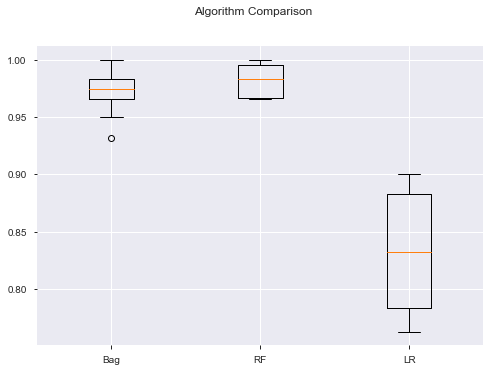

In [255]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111)
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

In [256]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
test_size=0.20       #80/20 breakup
seed=152             #seed 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=test_size,random_state=seed,stratify=Y)

In [257]:
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,Y_train)

y_pred=clf.predict(X_test)

In [258]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred)*100)

Accuracy: 96.63865546218487


In [260]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        64
         1.0       0.96      0.96      0.96        55

    accuracy                           0.97       119
   macro avg       0.97      0.97      0.97       119
weighted avg       0.97      0.97      0.97       119



**Here for disease prediction we are supposed to give more importance to the false negatives, i.e., the type-II errors because if the disease goes undetected it can be very lethal for any patient. Therefore to decrease the type-II errors, we will consider recall as our desired metric.**
